# IrisDataset

In [2]:
pip install graphviz


Note: you may need to restart the kernel to use updated packages.


In [3]:
# Basic libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot  as plt 

# Libraries for rendering and machine learning

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.model_selection import train_test_split
import graphviz

In [4]:
iris = load_iris()
X = iris.data
y=iris.target

df = pd.DataFrame(data=X, columns=iris['feature_names'])
df['target'] = y 

In [5]:
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [6]:
df.shape

(150, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [8]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [9]:
# Start training

# Distinguish sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)

# Train DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train,y_train)


DecisionTreeClassifier(random_state=42)

In [10]:
# preditions made through the model 
y_pred = clf.predict(X_test)

In [11]:
accuracy = np.mean(y_pred == y_test)
accuracy

0.9666666666666667

In [12]:
train_accuracy = clf.score(X_train, y_train)
print(f'Training Accuracy: {train_accuracy:.2f}')

Training Accuracy: 1.00


In [13]:
test_accuracy = clf.score(X_test, y_test)
print(f'Testing Accuracy: {test_accuracy:.2f}')

Testing Accuracy: 0.97


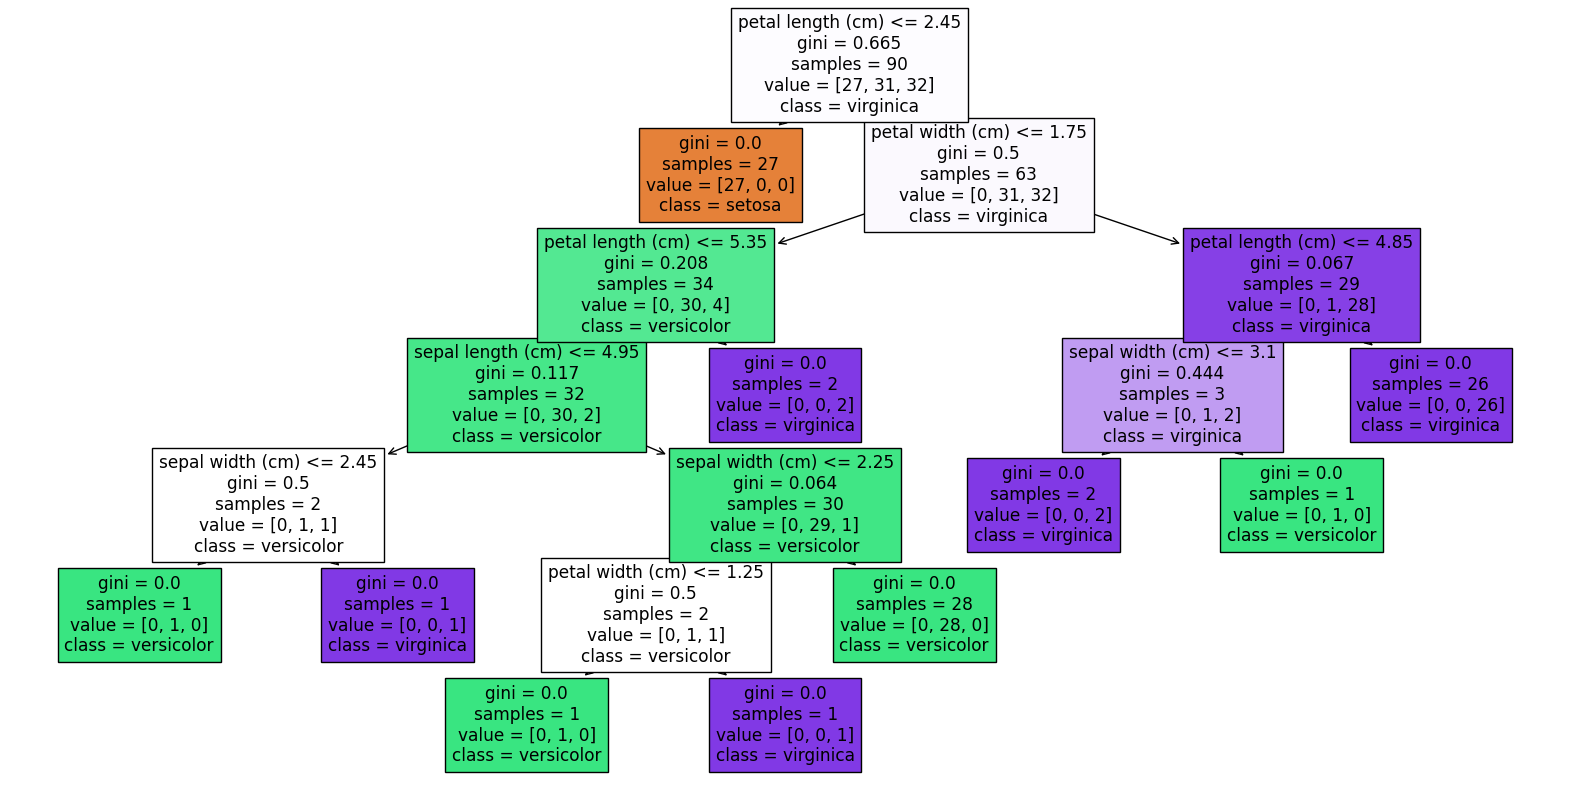

In [14]:
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()


In [15]:
# Visualize the decision tree using graphviz
dot_data = export_graphviz(clf, out_file=None, 
                           feature_names=iris.feature_names,  
                           class_names=iris.target_names,  
                           filled=True, rounded=True,  
                           special_characters=True)  


In [16]:
graph = graphviz.Source(dot_data)  


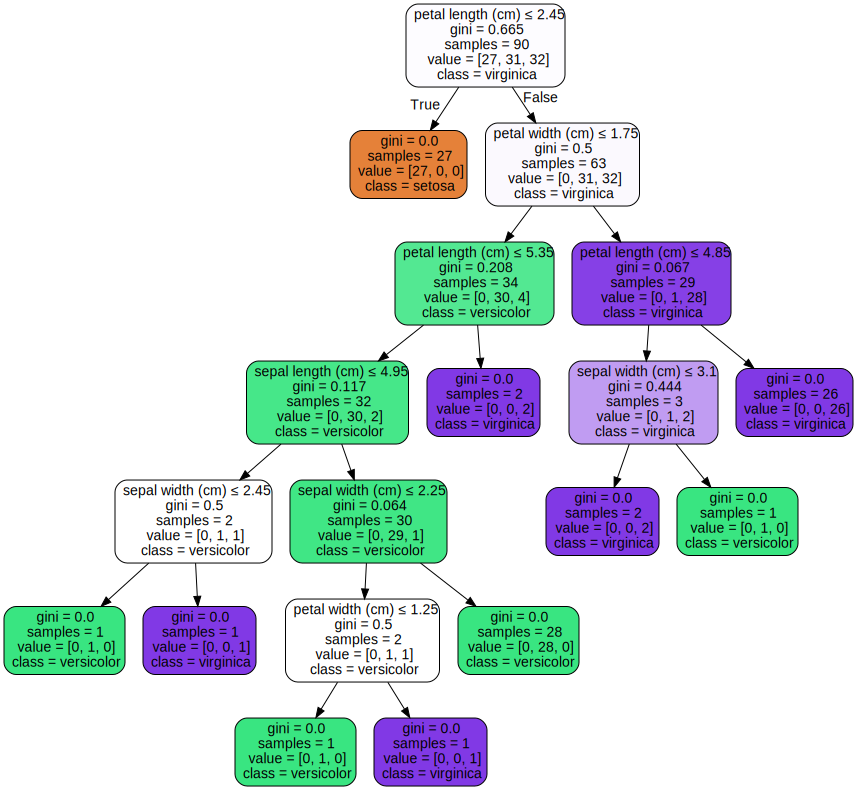

In [17]:
graph

In [18]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.95      0.95      0.95        19
           2       0.94      0.94      0.94        18

    accuracy                           0.97        60
   macro avg       0.96      0.96      0.96        60
weighted avg       0.97      0.97      0.97        60

